# Naive Bayes Classifier

## Install libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Read in the data

In [3]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


## Split the data into train/test sets (70/30 split)

In [4]:
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2['MENTHLTH2'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test dataset: ", X_test.shape) 
print("Number of rows/columns in y_test dataset: ", y_test.shape) 
print("Number of rows/columns in X_train dataset: ", X_train.shape) 
print("Number of rows/columns in y_train dataset: ", y_train.shape) 

Number of rows/columns in X_test dataset:  (135005, 15)
Number of rows/columns in y_test dataset:  (135005,)
Number of rows/columns in X_train dataset:  (315011, 15)
Number of rows/columns in y_train dataset:  (315011,)


## Fit the model

In [22]:
# class sklearn.naive_bayes.ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)

NB = ComplementNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
probs = NB.predict_proba(X_test)
probs = probs[:,1]

## Print the accuracy reports and confusion matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[80344 11946]
 [25233 17482]]
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81     92290
         1.0       0.59      0.41      0.48     42715

   micro avg       0.72      0.72      0.72    135005
   macro avg       0.68      0.64      0.65    135005
weighted avg       0.71      0.72      0.71    135005

0.7246101996222362


# Dealing with unbalanced data:

## The data is unbalanced, indicted by two things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows
### (2) The accuracy scores for the '1' values are far lower than the '0', showing the model is biased. It's good at predicting 'Good Mental Health', but not 'Poor Mental Health'.

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under-sampling' technique. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. I'll be re-running this with other re-sampling methods in the future for comparison.

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

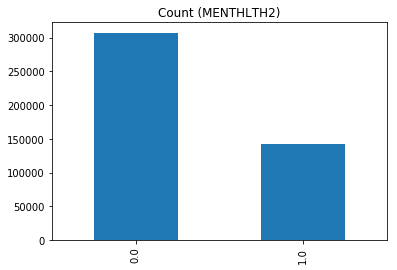

In [24]:
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

## First, re-check value counts for the target...you can see twice as many '0' values

In [25]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

## Now, we want to divide the target by value

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64


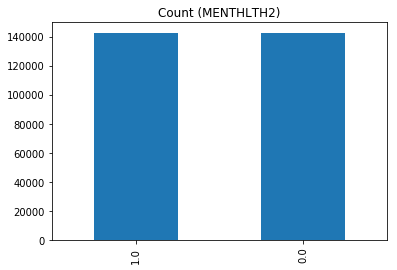

In [26]:
Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

### You can see above that we now have an equal amount of observations for both values of the target MENTHLTH2. We did lose a lot of information using this method, however, we still have a pretty large dataset to work with.

# Under-Sampled Model

## Let's re-run the model now

In [27]:
X_under = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_under = LLCP2_under['MENTHLTH2'].values

In [28]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test_under dataset: ", X_test_under.shape) 
print("Number of rows/columns in y_test_under dataset: ", y_test_under.shape) 
print("Number of rows/columns in X_train_under dataset: ", X_train_under.shape) 
print("Number of rows/columns in y_train_under dataset: ", y_train_under.shape) 

Number of rows/columns in X_test_under dataset:  (85608, 15)
Number of rows/columns in y_test_under dataset:  (85608,)
Number of rows/columns in X_train_under dataset:  (199750, 15)
Number of rows/columns in y_train_under dataset:  (199750,)


In [29]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 215047, 1.0: 99964}

In [30]:
unique, counts = np.unique(y_train_under, return_counts=True)
dict(zip(unique, counts))

{0.0: 99974, 1.0: 99776}

In [32]:
# class sklearn.naive_bayes.ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)

NB = ComplementNB()
NB.fit(X_train_under, y_train_under)
y_pred_under = NB.predict(X_test_under)
probs_under = NB.predict_proba(X_test_under)
probs_under = probs_under[:,1]

In [33]:
print(confusion_matrix(y_test_under,y_pred_under))
print(classification_report(y_test_under,y_pred_under))
print(accuracy_score(y_test_under, y_pred_under))

[[37147  5558]
 [25300 17603]]
              precision    recall  f1-score   support

         0.0       0.59      0.87      0.71     42705
         1.0       0.76      0.41      0.53     42903

   micro avg       0.64      0.64      0.64     85608
   macro avg       0.68      0.64      0.62     85608
weighted avg       0.68      0.64      0.62     85608

0.6395430333613681


## Now, let's run a ROC plot and get the area under the curve score (AUC)

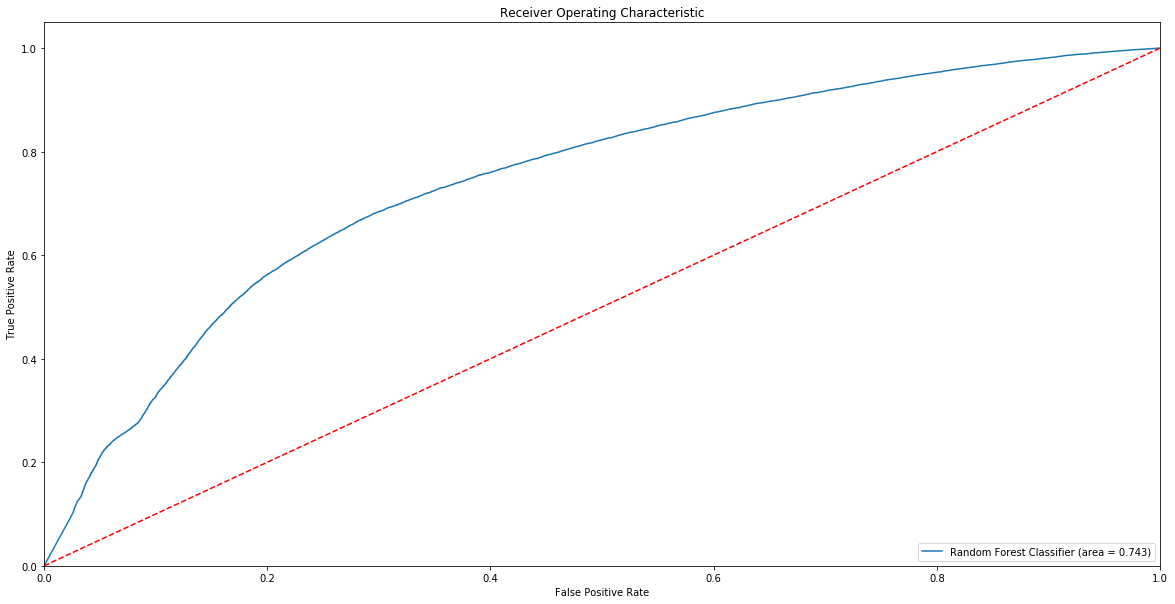

AUC: 0.743


In [34]:
roc_auc = roc_auc_score(y_test_under, probs_under)
fpr, tpr, thresholds = roc_curve(y_test_under, probs_under)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('AUC: %.3f' % roc_auc)

# Over-Sampled Model

## Using SMOTENC, we over-sample the minority class (MENTHLTH2 = 1) and take care to test/train split before preoceeding with re-sampling.

In [36]:
from imblearn.over_sampling import SMOTENC

# setting up testing and training sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)

sm = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,12,13,14], sampling_strategy='minority', random_state=0)
X_train_over, y_train_over = sm.fit_sample(X_train3, y_train3)

# describes info about train and test set 
print("Number of rows/columns in X_test3 dataset: ", X_test3.shape) 
print("Number of rows/columns in y_test3 dataset: ", y_test3.shape) 
print("Number of rows/columns in X_train_over dataset: ", X_train_over.shape) 
print("Number of rows/columns in y_train_over dataset: ", y_train_over.shape) 

Number of rows/columns in X_test3 dataset:  (135005, 15)
Number of rows/columns in y_test3 dataset:  (135005,)
Number of rows/columns in X_train_over dataset:  (430094, 15)
Number of rows/columns in y_train_over dataset:  (430094,)


In [37]:
unique, counts = np.unique(y_train3, return_counts=True)
dict(zip(unique, counts))

{0.0: 215047, 1.0: 99964}

In [38]:
unique, counts = np.unique(y_train_over, return_counts=True)
dict(zip(unique, counts))

{0.0: 215047, 1.0: 215047}

In [40]:
# class sklearn.naive_bayes.ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)

NB_over = ComplementNB()
NB_over.fit(X_train_over, y_train_over)
y_pred_over = NB_over.predict(X_test3)
probs_over = NB_over.predict_proba(X_test3)
#probs_over = probs_under[:,1]

In [41]:
print(confusion_matrix(y_test3,y_pred_over))
print(classification_report(y_test3,y_pred_over))
print(accuracy_score(y_test3, y_pred_over))

[[80176 12114]
 [24988 17727]]
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81     92290
         1.0       0.59      0.42      0.49     42715

   micro avg       0.73      0.73      0.73    135005
   macro avg       0.68      0.64      0.65    135005
weighted avg       0.71      0.73      0.71    135005

0.7251805488685604


In [42]:
roc_auc = roc_auc_score(y_test3, probs_over)
fpr, tpr, thresholds = roc_curve(y_test3, probs_over)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('AUC: %.3f' % roc_auc)

ValueError: bad input shape (135005, 2)